<a href="https://colab.research.google.com/github/deltorobarba/machinelearning/blob/master/wiener.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Wiener Process & Brownian Motion**

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## **Characterisations of a Wiener Process**

**The Wiener process is a real valued continuous-time (continuous state-space) stochastic process**

* W<sub>0</sub> = 0 (P-almost certain)
* The Wiener process has (stochastically) independent increments.
* The increases are therefore stationary and normally distributed with the expected value zero and the variance t - s.
* The individual paths are (P-) almost certainly continuous.

**Properties of a Wiener Process**

1. The Wiener process belongs to the family of **Markov processes** and there specifically to the class of **Levy processes**. It also fulfills the strong markov property. It is one of the best known Lévy processes (**càdlàg** stochastic processes with stationary independent increments).
2. The Wiener Process is a **special Gaussian process** with an expected value function E(W<sub>t</sub>)  = 0 and and the covariance function Cov (W<sub>s</sub>, W<sub>t</sub>) = min (s,t)
3. The Wiener process is a (continuous time) **martingale** (Lévy characterisation: the Wiener process is an almost surely continuous martingale with W0 = 0 and quadratic variation [Wt, Wt] = t, which means that Wt2 − t is also a martingale).
4. The Wiener process is a **Levy process** with steady paths and constant expectation 0.

*Another characterisation is that the Wiener process has a spectral representation as a sine series whose coefficients are independent N(0, 1) random variables. This representation can be obtained using the Karhunen–Loève theorem.*

**Applications**

* In physics it is used to study Brownian motion, the diffusion of minute particles suspended in fluid, and other types of diffusion via the Fokker–Planck and Langevin equations. 
* It also forms the basis for the rigorous path integral formulation of quantum mechanics (by the Feynman–Kac formula, a solution to the Schrödinger equation can be represented in terms of the Wiener process) and the study of eternal inflation in physical cosmology. 
* It is also prominent in the mathematical theory of finance, in particular the Black–Scholes option pricing model.

## **Relation to other Stochastic Processes**

**(Gaussian) White Noise**

* The Wiener process is used to represent the integral (from time zero to time t) of a zero mean, unit variance, delta correlated **<u>Gaussian</u> white noise process**

**Brownian Motion**

* A Wiener process is a stochastic process with **similar behavior to Brownian motion**, the physical phenomenon of a minute particle diffusing in a fluid.
* Sometimes the Wiener process is called "Brownian motion", although this is strictly speaking a confusion of a model with the phenomenon being modeled.
* Itō also paved the way for the Wiener process from physics to other sciences: the **stochastic differential equations** he set up made it possible to adapt the Brownian motion to more statistical problems. 
* The **geometric Brownian motion** derived from a stochastic differential equation solves the problem that the Wiener process, regardless of its starting value, almost certainly reaches negative values over time, which is impossible for stocks. Since the development of the famous **Black-Scholes model**, the geometric Brownian movement has been the standard.

**Ornstein-Uhlenbeck-Process**

* The problem raised by the **non-rectifiable paths** of the Wiener process in the modeling of Brownian paths leads to the Ornstein-Uhlenbeck process and also makes the need for a theory of stochastic integration and differentiation clear
* here it is not the motion but the speed of the particle as one that is not rectifiable process derived from the Wiener process, from which one obtains rectifiable particle paths through integration.

**Random Walk**

* **A Wiener process is the scaling limit of random walk in dimension 1**. This means that if you take a random walk with very small steps, you get an approximation to a Wiener process (and, less accurately, to Brownian motion). To be more precise, if the step size is ε, one needs to take a walk of length L/ε2 to approximate a Wiener length of L. As the step size tends to 0 (and the number of steps increases proportionally), **random walk converges to a Wiener process** in an appropriate sense. Formally, if B is the space of all paths of length L with the maximum topology, and if M is the space of measure over B with the norm topology, then the convergence is in the space M. Similarly, a Wiener process in several dimensions is the scaling limit of random walk in the same number of dimensions. The **convergence of a random walk toward the Wiener process is controlled by the central limit theorem**, and by **Donsker's theorem**. For a particle in a known fixed position at t = 0, the central limit theorem tells us that after a large number of independent steps in the random walk, the walker's position is distributed according to a normal distribution of total variance. The **Green's function** of the diffusion equation that controls the Wiener process, suggests that, **after a large number of steps, the random walk converges toward a Wiener process**.


* A random walk is a discrete fractal (a function with integer dimensions; 1, 2, ...), but a **Wiener process trajectory is a true fractal**, and there is a connection between the two (a Wiener process walk is a fractal of **Hausdorff dimension** 2). 

* Like the random walk, the Wiener process is **recurrent in one or two dimensions** (meaning that it returns almost surely to any fixed neighborhood of the origin infinitely often) whereas it is not recurrent in dimensions three and highe r. 


* Unlike the random walk, a **Wiener Process is scale invariant**. A Wiener process enjoys many symmetries random walk does not. For example, a **Wiener process walk is invariant to rotations, but the random walk is not**, since the underlying grid is not (random walk is invariant to rotations by 90 degrees, but Wiener processes are invariant to rotations by, for example, 17 degrees too). This means that in many cases, problems on a random walk are easier to solve by translating them to a Wiener process, solving the problem there, and then translating back. 

* Random walk and Wiener process can be coupled, namely manifested on the **same probability space in a dependent way that forces them to be quite close**. The simplest such coupling is the Skorokhod embedding, but there exist more precise couplings, such as Komlós–Major–Tusnády approximation theorem. The Wiener measure is the probability law on the space of continuous functions g, with g(0) = 0, induced by the Wiener process. An integral based on Wiener measure may be called a Wiener integral.



## **Simulating a Wiener Process**

**Each path is an independent Wiener process** ([Source](https://www.quantconnect.com/tutorials/introduction-to-options/stochastic-processes-and-monte-carlo-method))

Populating the interactive namespace from numpy and matplotlib


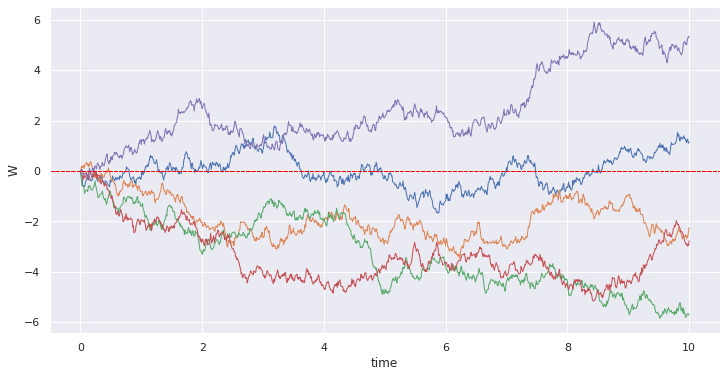

In [8]:
import numpy as np
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(12, 10), "lines.linewidth": 1.0})
%pylab inline
def wiener_process(T, N):
    """
    T: total time
    N: The total number of steps
    """
    W0 = [0]
    dt = T/float(N)
    # simulate the increments by normal random variable generator
    increments = np.random.normal(0, 1*np.sqrt(dt), N)
    W = W0 + list(np.cumsum(increments))
    return W

N = 1000
T = 10
dt = T / float(N)
t = np.linspace(0.0, N*dt, N+1)
plt.figure(figsize=(12,6))
for i in range(5):
    W = wiener_process(T, N)
    plt.plot(t, W)
    plt.xlabel('time')
    plt.ylabel('W')
    plt.grid(True)
    plt.axhline(y=0, color='red', linestyle='--', linewidth=1.0)

## **Brownian Bridge**

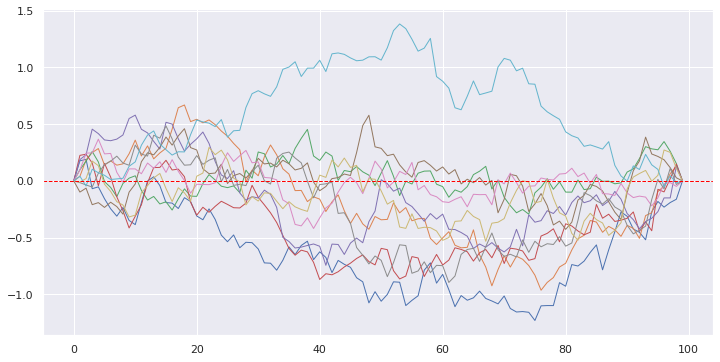

In [12]:
import six

seed = 0
N = 100
M = 10

np.random.seed(seed)

def sample_path_batch(M, N):
    dt = 1.0 / (N -1)                                                          #  changed from 1.0 / N
    dt_sqrt = np.sqrt(dt)
    B = np.empty((M, N), dtype=np.float32)
    B[:, 0] = 0
    for n in six.moves.range(N - 2):                                           # changed from "for n in six.moves.range(N - 1)"
         t = n * dt
         xi = np.random.randn(M) * dt_sqrt
         B[:, n + 1] = B[:, n] * (1 - dt / (1 - t)) + xi
    B[:, -1] = 0                                                               # added: set the last B to Zero
    return B

sns.set(rc={'figure.figsize':(12, 6), "lines.linewidth": 1.0})
B = sample_path_batch(M, N)
plt.plot(B.T)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.0)
plt.show()

## **Random Walk (with Drift) based on Geometric Brownian Motion**

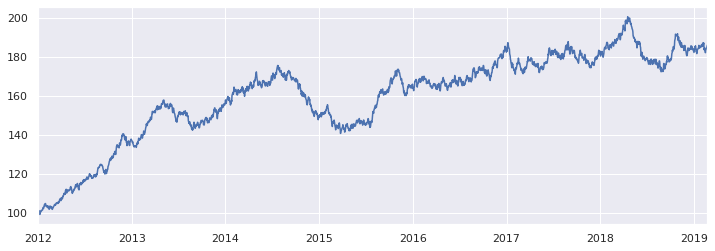

In [11]:
sns.set(rc={'figure.figsize':(12, 4)})

def geometric_brownian_motion(T = 1, N = 100, mu = 0.1, sigma = 0.01, S0 = 20): 
    dt = float(T)/N
    t = np.linspace(0, T, N)
    W = np.random.standard_normal(size = N) 
    W = np.cumsum(W)*np.sqrt(dt) ### standard brownian motion ###
    X = (mu-0.5*sigma**2)*t + sigma*W 
    S = S0*np.exp(X) ### geometric brownian motion ###
    return S

dates = pd.date_range('2012-01-01', '2019-02-22')
T = (dates.max()-dates.min()).days / 365
N = dates.size
start_price = 100
randomwalk = pd.Series(
    geometric_brownian_motion(T, N, sigma=0.1, S0=start_price), index=dates)

randomwalk.plot()